In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

C:\Users\arpit\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
train_dir = "C:/Users/arpit/DL all/DL all/cifar-10-img/train"
test_dir = "C:/Users/arpit/DL all/DL all/cifar-10-img/test"

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

test_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

In [4]:
train_batch_size = 5000
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=train_batch_size,
    class_mode='categorical'
)

Found 40079 images belonging to 10 classes.


In [5]:
test_batch_size = 1000
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=test_batch_size,
    class_mode='categorical'
)

Found 9921 images belonging to 10 classes.


In [6]:
x_train, y_train =  train_generator[0]
x_test, y_test = test_generator[0]

print(len(x_train))
print(len(x_test))

5000
1000


In [9]:
weights_path = "C:/Users/arpit/DL all/DL all/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(32, 32, 3))

In [10]:
for layer in base_model.layers:
   layer.trainable = False

In [11]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 284ms/step - accuracy: 0.2203 - loss: 2.1421 - val_accuracy: 0.4390 - val_loss: 1.6032
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 266ms/step - accuracy: 0.4261 - loss: 1.6180 - val_accuracy: 0.4880 - val_loss: 1.4627
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 239ms/step - accuracy: 0.4885 - loss: 1.4608 - val_accuracy: 0.5050 - val_loss: 1.4117
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 242ms/step - accuracy: 0.5232 - loss: 1.3377 - val_accuracy: 0.5090 - val_loss: 1.3721
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 231ms/step - accuracy: 0.5546 - loss: 1.2799 - val_accuracy: 0.5260 - val_loss: 1.3638
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 240ms/step - accuracy: 0.5743 - loss: 1.2260 - val_accuracy: 0.5310 - val_loss: 1.3408
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 252ms/step - accuracy: 0.5810 - loss: 1.1753 - val_accuracy: 0.5330 - val_loss: 1.3377
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 258ms/step - accuracy: 0.6138 - loss: 1.0981 - val_accu

In [13]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(32, 32, 3))

for layer in base_model.layers:
   layer.trainable = False

for layer in base_model.layers[len(base_model.layers) - 4:]:
   layer.trainable = True

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 55s 639ms/step - accuracy: 0.2311 - loss: 2.0945 - val_accuracy: 0.4540 - val_loss: 1.4108
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 45s 574ms/step - accuracy: 0.5249 - loss: 1.3068 - val_accuracy: 0.5360 - val_loss: 1.3314
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 45s 570ms/step - accuracy: 0.6027 - loss: 1.1372 - val_accuracy: 0.6100 - val_loss: 1.2002
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 45s 573ms/step - accuracy: 0.6955 - loss: 0.8749 - val_accuracy: 0.6030 - val_loss: 1.1658
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 46s 584ms/step - accuracy: 0.7282 - loss: 0.7979 - val_accuracy: 0.5990 - val_loss: 1.2756
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 49s 625ms/step - accuracy: 0.7526 - loss: 0.7226 - val_accuracy: 0.6350 - val_loss: 1.1657
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 50s 633ms/step - accuracy: 0.8190 - loss: 0.5647 - val_accuracy: 0.6410 - val_loss: 1.3103
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 49s 620ms/step - accuracy: 0.8447 - loss: 0.4747 - val_accu

In [14]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step


In [15]:
labels = list(test_generator.class_indices.keys())

Preditcted:  automobile
Actual:  truck


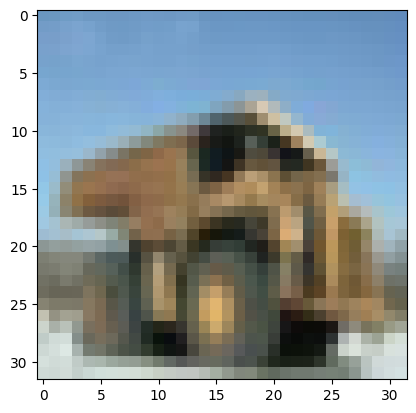

In [16]:
n = 890
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])

Preditcted:  cat
Actual:  horse


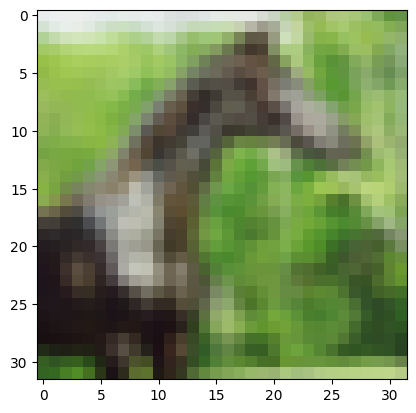

In [17]:
n = 590
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])

Preditcted:  airplane
Actual:  airplane


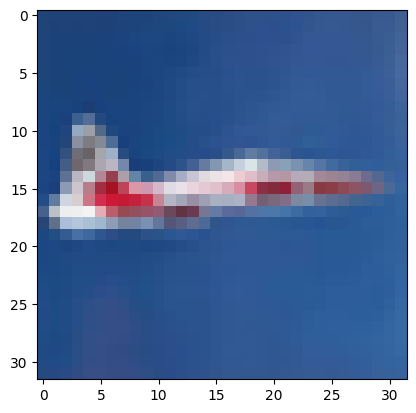

In [18]:
n = 600
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])